# Atomic Simulation with Python

## 1. Simulating the energetics for oxygen diffusion on platinum.

In [1]:
# Calculate O diffusion Energy on a Platinum Surface
# Let's load the python packages we will need
from ase.build import fcc111, add_adsorbate
from ase.constraints import FixAtoms
from ase.calculators.emt import EMT
from ase.optimize import QuasiNewton
from ase.visualize import view

# 4x4-Pt(111) surface with 4 layers and an
# O atom adsorbed in a fcc-hollow site:
slab = fcc111('Pt', size=(4, 4, 4))
slab.center(axis=2, vacuum=4.0)
add_adsorbate(slab, 'O', 1.25, 'fcc')

# Fix second and third layers:
mask = [atom.tag > 1 for atom in slab]
#print(mask)
slab.set_constraint(FixAtoms(mask=mask))
# Use EMT potential:
slab.set_calculator(EMT())

# We are going to calculate the structure of the Initial state by minimizing
#the forces on atoms through numerical optimization :
qn = QuasiNewton(slab, trajectory='initial.traj')
qn.run(fmax=0.01)
view(slab)
print(slab)



                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 10:53:06       11.762135*       7.9142
BFGSLineSearch:    1[  1] 10:53:06       10.214278*       1.0067
BFGSLineSearch:    2[  2] 10:53:07       10.068021*       0.4397
BFGSLineSearch:    3[  3] 10:53:07       10.025537*       0.1694
BFGSLineSearch:    4[  5] 10:53:07       10.013598*       0.0485
BFGSLineSearch:    5[  6] 10:53:07       10.012578*       0.0052
Atoms(symbols='OPt64', pbc=[True, True, False], cell=[[11.087434329005065, 0.0, 0.0], [5.5437171645025325, 9.601999791710057, 0.0], [0.0, 0.0, 14.78963916567]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]), calculator=EMT(...))


In [2]:
# 4x4-Pt(111) surface with 4 layers and an
# O atom adsorbed on the other side of the surface:
slab = fcc111('Pt', size=(4, 4, 4))
slab.center(axis=2, vacuum=4.0)
add_adsorbate(slab, 'O', 1.25, position=(10,6))


# Fix second and third layers:
mask = [atom.tag > 1 for atom in slab]
#print(mask)
slab.set_constraint(FixAtoms(mask=mask))
# Use EMT potential:
slab.set_calculator(EMT())

# Final state:
qn = QuasiNewton(slab, trajectory='final.traj')
qn.run(fmax=0.01)
view(slab)
print(slab)

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 10:53:10       12.931905*      13.8177
BFGSLineSearch:    1[  1] 10:53:10       10.374012*       1.9868
BFGSLineSearch:    2[  2] 10:53:11       10.123256*       0.6328
BFGSLineSearch:    3[  3] 10:53:11       10.060169*       0.2316
BFGSLineSearch:    4[  4] 10:53:11       10.040064*       0.1340
BFGSLineSearch:    5[  5] 10:53:11       10.034029*       0.1065
BFGSLineSearch:    6[  6] 10:53:11       10.032282*       0.0932
BFGSLineSearch:    7[  8] 10:53:11       10.029925*       0.1004
BFGSLineSearch:    8[ 11] 10:53:11       10.020775*       0.0896
BFGSLineSearch:    9[ 13] 10:53:11       10.017212*       0.0879
BFGSLineSearch:   10[ 15] 10:53:12       10.014909*       0.0400
BFGSLineSearch:   11[ 16] 10:53:12       10.014429*       0.0557
BFGSLineSearch:   12[ 17] 10:53:12       10.013993*       0.0446
BFGSLineSearch:   13[ 19] 10:53:12       

In [3]:
# Next we are going to take our initial and final structures and do 
#a simulation that will calculate the energy to move between them
from ase.io import read
from ase.constraints import FixAtoms
from ase.calculators.emt import EMT
from ase.neb import NEB
from ase.optimize import BFGS

initial = read('initial.traj')
final = read('final.traj')

constraint = FixAtoms(mask=[atom.tag > 1 for atom in initial])

images = [initial]
for i in range(9):
    image = initial.copy()
    image.set_calculator(EMT())
    image.set_constraint(constraint)
    images.append(image)

images.append(final)

neb = NEB(images)
neb.interpolate()
qn = BFGS(neb, trajectory='O_diffusion.traj')
qn.run(fmax=0.01)

      Step     Time          Energy         fmax
BFGS:    0 10:53:17       11.952573       13.5480
BFGS:    1 10:53:18       10.341315        2.7738
BFGS:    2 10:53:19       10.262182        1.5808
BFGS:    3 10:53:20       10.222886        1.0025
BFGS:    4 10:53:21       10.210267        0.9198
BFGS:    5 10:53:22       10.168778        0.2810
BFGS:    6 10:53:23       10.165129        0.2286
BFGS:    7 10:53:24       10.163920        0.1175
BFGS:    8 10:53:25       10.163112        0.0757
BFGS:    9 10:53:26       10.162314        0.0838
BFGS:   10 10:53:27       10.161827        0.0826
BFGS:   11 10:53:28       10.161634        0.0658
BFGS:   12 10:53:28       10.161567        0.0314
BFGS:   13 10:53:29       10.161544        0.0140
BFGS:   14 10:53:30       10.161530        0.0185
BFGS:   15 10:53:31       10.161503        0.0283
BFGS:   16 10:53:32       10.161466        0.0238
BFGS:   17 10:53:33       10.161439        0.0100


True

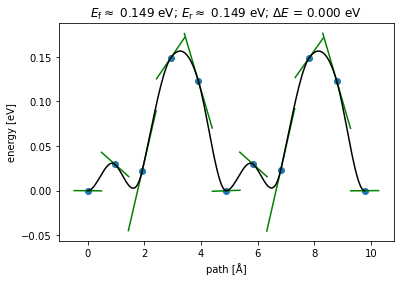

In [4]:
#The code below will take our simulation results and allow us to 
# visualize them
import matplotlib.pyplot as plt
from ase.neb import NEBTools
from ase.io import read

images = read('O_diffusion.traj@-11:')

nebtools = NEBTools(images)

# Get the calculated barriers and the energy change of the reaction.
Ef, dE = nebtools.get_barrier()

# Get the barriers without any interpolation between highest images.
Ef, dE = nebtools.get_barrier(fit=False)

# Get the actual maximum force at this point in the simulation.
max_force = nebtools.get_fmax()

# Create a figure.
fig = nebtools.plot_band()
fig.savefig('diffusion-barrier.png')

view(images)

## 2. Simulating the energetics for dioxygen dissociation and diffusion on platinum.

In [5]:
# 4x4-Pt(111) surface with 4 layers and an
# O2 molecule adsorbed in a fcc-hollow site:
slab = fcc111('Pt', size=(4, 4, 4))
slab.center(axis=2, vacuum=4.0)
add_adsorbate(slab, 'O', 1.25, 'fcc')
add_adsorbate(slab, 'O', 2.45, 'fcc')

# Fix second and third layers:
mask = [atom.tag > 1 for atom in slab]
#print(mask)
slab.set_constraint(FixAtoms(mask=mask))
# Use EMT potential:
slab.set_calculator(EMT())

# Initial state:
qn = QuasiNewton(slab, trajectory='initial.traj')
qn.run(fmax=0.01)
view(slab)
print(slab)

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 10:53:58       12.826482*       6.0757
BFGSLineSearch:    1[  1] 10:53:58       11.232287*       4.3166
BFGSLineSearch:    2[  3] 10:53:58       10.928994*       1.0228
BFGSLineSearch:    3[  4] 10:53:58       10.756724*       0.8551
BFGSLineSearch:    4[  6] 10:53:58       10.599909*       0.3490
BFGSLineSearch:    5[  8] 10:53:58       10.517503*       0.1725
BFGSLineSearch:    6[  9] 10:53:58       10.511611*       0.1282
BFGSLineSearch:    7[ 10] 10:53:58       10.509274*       0.1117
BFGSLineSearch:    8[ 11] 10:53:58       10.508337*       0.0590
BFGSLineSearch:    9[ 12] 10:53:59       10.508029*       0.0087
Atoms(symbols='O2Pt64', pbc=[True, True, False], cell=[[11.087434329005065, 0.0, 0.0], [5.5437171645025325, 9.601999791710057, 0.0], [0.0, 0.0, 14.78963916567]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1

In [6]:
# 4x4-Pt(111) surface with 4 layers and an
# 2 O atoms adsorbed:
slab = fcc111('Pt', size=(4, 4, 4))
slab.center(axis=2, vacuum=4.0)
add_adsorbate(slab, 'O', 1.25, 'fcc')
add_adsorbate(slab, 'O', 1.25, position=(10,6))




# Fix second and third layers:
mask = [atom.tag > 1 for atom in slab]
#print(mask)
slab.set_constraint(FixAtoms(mask=mask))
# Use EMT potential:
slab.set_calculator(EMT())

# Initial state:
qn = QuasiNewton(slab, trajectory='final.traj')
qn.run(fmax=0.01)
view(slab)
print(slab)

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 10:54:02       14.389340*      13.8178
BFGSLineSearch:    1[  1] 10:54:02       10.668099*       3.3870
BFGSLineSearch:    2[  2] 10:54:02       10.276697*       2.3372
BFGSLineSearch:    3[  3] 10:54:02        9.988974*       0.4510
BFGSLineSearch:    4[  4] 10:54:02        9.943047*       0.1645
BFGSLineSearch:    5[  5] 10:54:02        9.928651*       0.1035
BFGSLineSearch:    6[  6] 10:54:02        9.926419*       0.0953
BFGSLineSearch:    7[  8] 10:54:02        9.924158*       0.0938
BFGSLineSearch:    8[ 10] 10:54:02        9.917130*       0.0998
BFGSLineSearch:    9[ 11] 10:54:02        9.913076*       0.1193
BFGSLineSearch:   10[ 13] 10:54:03        9.910037*       0.0626
BFGSLineSearch:   11[ 15] 10:54:03        9.908081*       0.0561
BFGSLineSearch:   12[ 17] 10:54:03        9.907226*       0.0372
BFGSLineSearch:   13[ 18] 10:54:03       

In [7]:
initial = read('initial.traj')
final = read('final.traj')

constraint = FixAtoms(mask=[atom.tag > 1 for atom in initial])

images = [initial]
for i in range(11):
    image = initial.copy()
    image.set_calculator(EMT())
    image.set_constraint(constraint)
    images.append(image)

images.append(final)

neb = NEB(images)
neb.interpolate()
qn = BFGS(neb, trajectory='O2_dissociation.traj')
qn.run(fmax=0.1)

      Step     Time          Energy         fmax
BFGS:    0 10:54:11       12.506708        3.3370
BFGS:    1 10:54:13       12.265063        3.4701
BFGS:    2 10:54:14       11.398039        3.1177
BFGS:    3 10:54:16       10.937513        6.9858
BFGS:    4 10:54:17       10.811866        2.8276
BFGS:    5 10:54:19       10.639856        2.3322
BFGS:    6 10:54:20       10.496119        1.9243
BFGS:    7 10:54:21       10.481861        0.7950
BFGS:    8 10:54:23       10.476123        0.6217
BFGS:    9 10:54:24       10.486527        0.7906
BFGS:   10 10:54:25       10.485097        0.7759
BFGS:   11 10:54:27       10.472334        0.6213
BFGS:   12 10:54:28       10.469354        0.5232
BFGS:   13 10:54:29       10.470079        0.4732
BFGS:   14 10:54:31       10.469679        0.4413
BFGS:   15 10:54:32       10.467239        0.4203
BFGS:   16 10:54:33       10.465488        0.3822
BFGS:   17 10:54:35       10.464848        0.3854
BFGS:   18 10:54:36       10.463929        0.3708
B

True

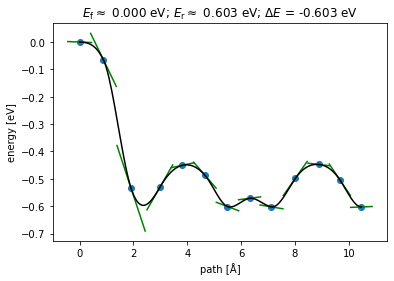

In [8]:
images = read('O2_dissociation.traj@-13:')

nebtools = NEBTools(images)

# Get the calculated barrier and the energy change of the reaction.
Ef, dE = nebtools.get_barrier()

# Get the barrier without any interpolation between highest images.
Ef, dE = nebtools.get_barrier(fit=False)

# Get the actual maximum force at this point in the simulation.
max_force = nebtools.get_fmax()

# Create a figure like that coming from ASE-GUI.
fig = nebtools.plot_band()
fig.savefig('diffusion-barrier.png')
# To view movie with ase gui $ase gui neb.traj@-5:
# Then use NEB tools

view(images)

## Molecular Dynamics Simulation of dioxygen on platinum

In [9]:
from ase.lattice.cubic import FaceCenteredCubic
from ase.md.langevin import Langevin
from ase.io.trajectory import Trajectory
from ase import units
from ase.md.velocitydistribution import (MaxwellBoltzmannDistribution, Stationary)


#from asap3 import EMT  # Way too slow with ase.EMT !
#size = 2

T = 250  # Kelvin
slab = read('initial.traj')
slab.set_constraint()

# Set up a crystal
#slab = fcc111('Pt', size=(4, 4, 4))
#slab.center(axis=2, vacuum=4.0)
#add_adsorbate(slab, 'O', 1.25, 'fcc')
#add_adsorbate(slab, 'O', 2.45, 'fcc')

# Fix second and third layers:
#mask = [atom.tag > 1 for atom in slab]
#print(mask)
#slab.set_constraint(FixAtoms(mask=mask))
# Use EMT potential:
slab.set_calculator(EMT())
MaxwellBoltzmannDistribution(slab, temperature_K=200)
Stationary(slab)  # zero linear momentum





# We want to run MD with constant energy using the Langevin algorithm
# with a time step of 5 fs, the temperature T and the friction
# coefficient to 0.02 atomic units.
dyn = Langevin(slab, 5 * units.fs, T * units.kB, 0.002)


def printenergy(a=slab):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))


dyn.attach(printenergy, interval=10)

# We also want to save the positions of all atoms after every 100th time step.
traj = Trajectory('moldyn3.traj', 'w', slab)
dyn.attach(traj.write, interval=1)

# Now run the dynamics
printenergy()
dyn.run(1000)

/opt/anaconda3/lib/python3.8/site-packages/ase/md/md.py:48: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


Energy per atom: Epot = 0.159eV  Ekin = 0.029eV (T=223K)  Etot = 0.188eV
Energy per atom: Epot = 0.159eV  Ekin = 0.029eV (T=223K)  Etot = 0.188eV
Energy per atom: Epot = 0.176eV  Ekin = 0.014eV (T=105K)  Etot = 0.189eV
Energy per atom: Epot = 0.178eV  Ekin = 0.011eV (T= 87K)  Etot = 0.189eV
Energy per atom: Epot = 0.172eV  Ekin = 0.017eV (T=134K)  Etot = 0.189eV
Energy per atom: Epot = 0.168eV  Ekin = 0.020eV (T=156K)  Etot = 0.189eV
Energy per atom: Epot = 0.167eV  Ekin = 0.021eV (T=162K)  Etot = 0.188eV
Energy per atom: Epot = 0.168eV  Ekin = 0.021eV (T=163K)  Etot = 0.189eV
Energy per atom: Epot = 0.173eV  Ekin = 0.016eV (T=121K)  Etot = 0.189eV
Energy per atom: Epot = 0.165eV  Ekin = 0.025eV (T=193K)  Etot = 0.190eV
Energy per atom: Epot = 0.169eV  Ekin = 0.021eV (T=159K)  Etot = 0.190eV
Energy per atom: Epot = 0.169eV  Ekin = 0.021eV (T=163K)  Etot = 0.190eV
Energy per atom: Epot = 0.166eV  Ekin = 0.024eV (T=183K)  Etot = 0.190eV
Energy per atom: Epot = 0.170eV  Ekin = 0.021eV (T=

True

In [10]:
images = read('moldyn3.traj@-1')
view(images)

In [16]:
slab = fcc111('Pt', size=(4, 4, 4))
slab.center(axis=2, vacuum=4.0)
add_adsorbate(slab, 'O', 1.25, 'fcc')
add_adsorbate(slab, 'O', 2.45, 'fcc')
add_adsorbate(slab, 'C', 1.25, position=(9.5,5.5))
add_adsorbate(slab, 'O', 2.25, position=(9.5,5.5))




# Fix second and third layers:
mask = [atom.tag > 1 for atom in slab]
#print(mask)
slab.set_constraint(FixAtoms(mask=mask))
# Use EMT potential:
slab.set_calculator(EMT())

# Initial state:
qn = QuasiNewton(slab, trajectory='initial.traj')
qn.run(fmax=0.01)
view(slab)
print(slab)

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 12:00:59       14.094135*       6.0758
BFGSLineSearch:    1[  1] 12:00:59       11.693203*       4.3197
BFGSLineSearch:    2[  2] 12:00:59       11.342202*       2.2029
BFGSLineSearch:    3[  3] 12:00:59       11.070537*       2.2595
BFGSLineSearch:    4[  5] 12:01:00       10.884476*       0.7209
BFGSLineSearch:    5[  7] 12:01:00       10.708614*       0.5448
BFGSLineSearch:    6[  8] 12:01:00       10.659513*       0.1838
BFGSLineSearch:    7[  9] 12:01:00       10.642989*       0.1103
BFGSLineSearch:    8[ 11] 12:01:00       10.639598*       0.0574
BFGSLineSearch:    9[ 13] 12:01:00       10.637293*       0.1108
BFGSLineSearch:   10[ 15] 12:01:00       10.633583*       0.1774
BFGSLineSearch:   11[ 18] 12:01:01       10.622843*       0.5647
BFGSLineSearch:   12[ 24] 12:01:01       10.480608*       0.7849
BFGSLineSearch:   13[ 26] 12:01:01       

In [17]:
T = 250  # Kelvin
slab = read('initial.traj')
slab.set_constraint()

# Set up a crystal
#slab = fcc111('Pt', size=(4, 4, 4))
#slab.center(axis=2, vacuum=4.0)
#add_adsorbate(slab, 'O', 1.25, 'fcc')
#add_adsorbate(slab, 'O', 2.45, 'fcc')

# Fix second and third layers:
#mask = [atom.tag > 1 for atom in slab]
#print(mask)
#slab.set_constraint(FixAtoms(mask=mask))
# Use EMT potential:
slab.set_calculator(EMT())
MaxwellBoltzmannDistribution(slab, temperature_K=200)
Stationary(slab)  # zero linear momentum





# We want to run MD with constant energy using the Langevin algorithm
# with a time step of 5 fs, the temperature T and the friction
# coefficient to 0.02 atomic units.
dyn = Langevin(slab, 5 * units.fs, T * units.kB, 0.002)


def printenergy(a=slab):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))


dyn.attach(printenergy, interval=10)

# We also want to save the positions of all atoms after every 100th time step.
traj = Trajectory('moldyn3.traj', 'w', slab)
dyn.attach(traj.write, interval=1)

# Now run the dynamics
printenergy()
dyn.run(1000)

Energy per atom: Epot = 0.141eV  Ekin = 0.025eV (T=197K)  Etot = 0.166eV
Energy per atom: Epot = 0.141eV  Ekin = 0.025eV (T=197K)  Etot = 0.166eV
Energy per atom: Epot = 0.154eV  Ekin = 0.013eV (T=101K)  Etot = 0.167eV
Energy per atom: Epot = 0.158eV  Ekin = 0.010eV (T= 79K)  Etot = 0.168eV
Energy per atom: Epot = 0.154eV  Ekin = 0.013eV (T=101K)  Etot = 0.168eV
Energy per atom: Epot = 0.152eV  Ekin = 0.016eV (T=124K)  Etot = 0.168eV
Energy per atom: Epot = 0.153eV  Ekin = 0.016eV (T=124K)  Etot = 0.169eV
Energy per atom: Epot = 0.154eV  Ekin = 0.015eV (T=116K)  Etot = 0.169eV
Energy per atom: Epot = 0.152eV  Ekin = 0.017eV (T=129K)  Etot = 0.168eV
Energy per atom: Epot = 0.153eV  Ekin = 0.016eV (T=122K)  Etot = 0.169eV
Energy per atom: Epot = 0.155eV  Ekin = 0.014eV (T=112K)  Etot = 0.169eV
Energy per atom: Epot = 0.156eV  Ekin = 0.013eV (T=101K)  Etot = 0.169eV
Energy per atom: Epot = 0.151eV  Ekin = 0.019eV (T=145K)  Etot = 0.170eV
Energy per atom: Epot = 0.155eV  Ekin = 0.015eV (T=

True

In [18]:
images = read('moldyn3.traj@-1')
view(images)